ARD Regression on the Data Set of Developing Country

In [126]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [127]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developing_Country_Data_WB.xlsx", None)

In [128]:
df.keys()

odict_keys(['ARG', 'BGD', 'BGR', 'BRA', 'CHN', 'IDN', 'IND', 'IRN', 'KWT', 'MEX', 'MYS', 'PHL', 'POL', 'QAT', 'ROU', 'RUS', 'THA', 'TUR', 'VEN', 'ZAF', 'TOTAL', 'Sheet1'])

In [129]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developing_Country_Data_WB.xlsx", sheet_name='Sheet1')

In [130]:
df.head()

,Country,Country_Code,Category,Year,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,Argentina,ARG,Developing,2006,124.583000,6.611915e+06,1.757990e+06,NaN,NaN,6.791435e+10,...,0.45216,20.927202,3.2,101.0,7,NaN,13.0,18.8,29.5,0.240650
1,Argentina,ARG,Developing,2007,132.675000,7.036784e+06,1.874259e+06,NaN,2.81,7.882717e+10,...,0.46007,25.946633,2.6,106.0,7,NaN,13.0,15.9,29.5,0.240467
2,Argentina,ARG,Developing,2008,131.685000,6.147290e+06,1.997146e+06,NaN,NaN,9.499019e+10,...,0.47055,28.112623,2.6,107.0,7,NaN,14.0,12.4,30.0,0.237290
3,Argentina,ARG,Developing,2009,111.663000,5.694547e+06,1.626835e+06,NaN,NaN,8.419046e+10,...,0.58398,34.000000,2.5,101.0,7,NaN,14.0,9.8,25.0,0.189667
4,Argentina,ARG,Developing,2010,193.301254,9.025035e+06,1.992124e+06,NaN,2.75,1.070031e+11,...,0.56104,45.000000,2.2,101.0,7,NaN,14.0,9.1,24.5,0.207609


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 31 columns):
Country                                           185 non-null object
Country_Code                                      185 non-null object
Category                                          185 non-null object
Year                                              185 non-null int64
Air_freight_million_ton_km                        185 non-null float64
Air_passengers_carried                            185 non-null float64
Container_port_traffic_TEU                        183 non-null float64
Railways_goods_trans_million_ton-km               89 non-null float64
Logistic_performance                              87 non-null float64
Industry_value_added_current_USD                  179 non-null float64
Manufacturing_value added_%_of_GDP                184 non-null float64
Services_value_added_%_of_GDP                     179 non-null float64
Employment_in_industry_%_of_total_employment      

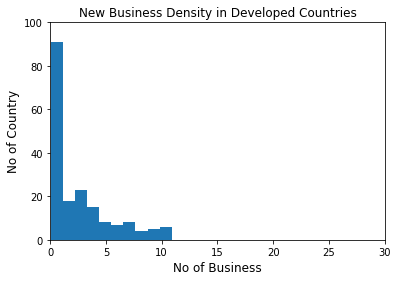

In [132]:
plt.hist((df['New_business_density']), color = '#1f77b4')
plt.xlim(0,30)
plt.ylim(0,100)
plt.xlabel('No of Business',fontsize=12)
plt.ylabel('No of Country', fontsize=12)
plt.title("New Business Density in Developed Countries")
plt.show()

In [133]:
data_points=(df['New_business_density']).to_numpy()

In [134]:
import statsmodels.api as sm 
import pylab as py 

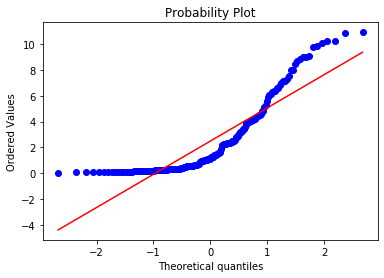

In [135]:
import pylab
stats.probplot(data_points, dist="norm", plot=pylab)
pylab.show()

In [136]:
df["New_business_density"].describe()

count    185.000000
mean       2.487582
std        2.837736
min        0.041292
25%        0.326716
50%        1.178486
75%        3.951467
max       10.911789
Name: New_business_density, dtype: float64

In [137]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [138]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [139]:
df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)

In [140]:
df.head()

,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,Manufacturing_value added_%_of_GDP,Services_value_added_%_of_GDP,Employment_in_industry_%_of_total_employment,GDP_per_capita_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,124.583000,6.611915e+06,1.757990e+06,NaN,NaN,6.791435e+10,17.877794,48.749133,23.673000,5919.012037,...,0.45216,20.927202,3.2,101.0,7,NaN,13.0,18.8,29.5,0.240650
1,132.675000,7.036784e+06,1.874259e+06,NaN,2.81,7.882717e+10,17.047415,49.508331,23.847000,7245.448317,...,0.46007,25.946633,2.6,106.0,7,NaN,13.0,15.9,29.5,0.240467
2,131.685000,6.147290e+06,1.997146e+06,NaN,NaN,9.499019e+10,16.538366,50.255192,24.021000,9020.873098,...,0.47055,28.112623,2.6,107.0,7,NaN,14.0,12.4,30.0,0.237290
3,111.663000,5.694547e+06,1.626835e+06,NaN,NaN,8.419046e+10,15.583777,53.306001,23.190001,8225.137176,...,0.58398,34.000000,2.5,101.0,7,NaN,14.0,9.8,25.0,0.189667
4,193.301254,9.025035e+06,1.992124e+06,NaN,2.75,1.070031e+11,15.844861,51.495180,23.340000,10385.964432,...,0.56104,45.000000,2.2,101.0,7,NaN,14.0,9.1,24.5,0.207609


In [141]:
data=imp.fit_transform(df)

In [142]:
print(data)

[[1.24583000e+02 6.61191500e+06 1.75799000e+06 ... 1.88000000e+01
  2.95000000e+01 2.40650412e-01]
 [1.32675000e+02 7.03678400e+06 1.87425900e+06 ... 1.59000000e+01
  2.95000000e+01 2.40466755e-01]
 [1.31685000e+02 6.14729000e+06 1.99714600e+06 ... 1.24000000e+01
  3.00000000e+01 2.37290147e-01]
 ...
 [1.04273626e+03 1.70266432e+07 4.56799300e+06 ... 0.00000000e+00
  4.60000000e+01 6.57481813e+00]
 [8.92734324e+02 1.88828980e+07 4.66230000e+06 ... 0.00000000e+00
  4.60000000e+01 8.67781982e+00]
 [7.67271186e+02 1.97449320e+07 4.45400000e+06 ... 0.00000000e+00
  4.50000000e+01 1.02077982e+01]]


In [143]:
dataset=pd.DataFrame({'Air_freight': data[:, 0], 'Air_passenger': data[:, 1], 'Container_traffic': data[:, 2], 'Railway_transport': data[:, 3],
                       'Logistic_performance': data[:, 4], 'Industry_valueadded': data[:, 5],'Mfg_valueadded': data[:, 6], 'Service_valueadded': data[:, 7],
                       'Emp_in_industry': data[:, 8], 'GDP_per_capita': data[:, 9],'Final_consumption': data[:, 10], 'Primary_completion': data[:, 11],
                       'Edu_attainment': data[:, 12], 'Hightech_export': data[:, 13],'Treadmark_appl': data[:, 14], 'Patent_appl': data[:, 15],
                       'Scientific_journal': data[:, 16], 'R&D_exp': data[:, 17],'Individual_using_internet': data[:, 18], 'Poverty_headcount': data[:, 19],
                      'Listed_companies': data[:, 20],'Business_disclosure': data[:, 21],'Ease_of_doing_business': data[:, 22],
                       'Start_up_procedure': data[:, 23],'Cost_of_business': data[:, 24],
                      'Time_to_start_business': data[:, 25],'New_business_density': data[:, 26]})

In [144]:
dataset.head()

,Air_freight,Air_passenger,Container_traffic,Railway_transport,Logistic_performance,Industry_valueadded,Mfg_valueadded,Service_valueadded,Emp_in_industry,GDP_per_capita,...,R&D_exp,Individual_using_internet,Poverty_headcount,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business,Time_to_start_business,New_business_density
0,124.583000,6.611915e+06,1.757990e+06,-178589.291452,2.817401,6.791435e+10,17.877794,48.749133,23.673000,5919.012037,...,0.45216,20.927202,3.2,101.0,7.0,44.868393,13.0,18.8,29.5,0.240650
1,132.675000,7.036784e+06,1.874259e+06,-222738.773765,2.810000,7.882717e+10,17.047415,49.508331,23.847000,7245.448317,...,0.46007,25.946633,2.6,106.0,7.0,45.589215,13.0,15.9,29.5,0.240467
2,131.685000,6.147290e+06,1.997146e+06,-324623.482676,2.874710,9.499019e+10,16.538366,50.255192,24.021000,9020.873098,...,0.47055,28.112623,2.6,107.0,7.0,42.192366,14.0,12.4,30.0,0.237290
3,111.663000,5.694547e+06,1.626835e+06,-300597.648005,2.871134,8.419046e+10,15.583777,53.306001,23.190001,8225.137176,...,0.58398,34.000000,2.5,101.0,7.0,45.069923,14.0,9.8,25.0,0.189667
4,193.301254,9.025035e+06,1.992124e+06,-356834.545588,2.750000,1.070031e+11,15.844861,51.495180,23.340000,10385.964432,...,0.56104,45.000000,2.2,101.0,7.0,48.402036,14.0,9.1,24.5,0.207609


In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 27 columns):
Air_freight                  185 non-null float64
Air_passenger                185 non-null float64
Container_traffic            185 non-null float64
Railway_transport            185 non-null float64
Logistic_performance         185 non-null float64
Industry_valueadded          185 non-null float64
Mfg_valueadded               185 non-null float64
Service_valueadded           185 non-null float64
Emp_in_industry              185 non-null float64
GDP_per_capita               185 non-null float64
Final_consumption            185 non-null float64
Primary_completion           185 non-null float64
Edu_attainment               185 non-null float64
Hightech_export              185 non-null float64
Treadmark_appl               185 non-null float64
Patent_appl                  185 non-null float64
Scientific_journal           185 non-null float64
R&D_exp                      185 non-null flo

In [146]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(dataset.values)

In [147]:
scaled_features_df = pd.DataFrame(scaled_features, index=dataset.index, columns=dataset.columns)

In [148]:
scaled_features_df.head()

,Air_freight,Air_passenger,Container_traffic,Railway_transport,Logistic_performance,Industry_valueadded,Mfg_valueadded,Service_valueadded,Emp_in_industry,GDP_per_capita,...,R&D_exp,Individual_using_internet,Poverty_headcount,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business,Time_to_start_business,New_business_density
0,-0.711415,-0.861198,-0.740283,-0.392319,-0.368940,-0.797198,0.104988,-0.483669,-0.391379,-0.386003,...,-0.684801,-1.026810,0.001901,-0.455573,-0.131511,-1.641862,1.006734,-0.063845,0.120223,-0.793953
1,-0.707225,-0.848489,-0.718914,-0.454988,-0.393373,-0.734287,-0.049803,-0.382133,-0.371009,-0.307411,...,-0.659506,-0.813036,-0.060570,-0.451689,-0.131511,-1.569937,1.006734,-0.119226,0.120223,-0.794018
2,-0.707737,-0.875096,-0.696329,-0.599612,-0.179754,-0.641109,-0.144694,-0.282246,-0.350639,-0.202217,...,-0.625992,-0.720788,-0.060570,-0.450912,-0.131511,-1.908883,1.291936,-0.186065,0.149099,-0.795140
3,-0.718104,-0.888638,-0.764387,-0.565507,-0.191556,-0.703368,-0.322639,0.125774,-0.447923,-0.249364,...,-0.263257,-0.470048,-0.070982,-0.455573,-0.131511,-1.621753,1.291936,-0.235716,-0.139654,-0.811968
4,-0.675834,-0.789018,-0.697252,-0.645335,-0.591446,-0.571856,-0.273970,-0.116408,-0.430363,-0.121335,...,-0.336617,-0.001566,-0.102217,-0.455573,-0.131511,-1.289267,1.291936,-0.249084,-0.168529,-0.805628


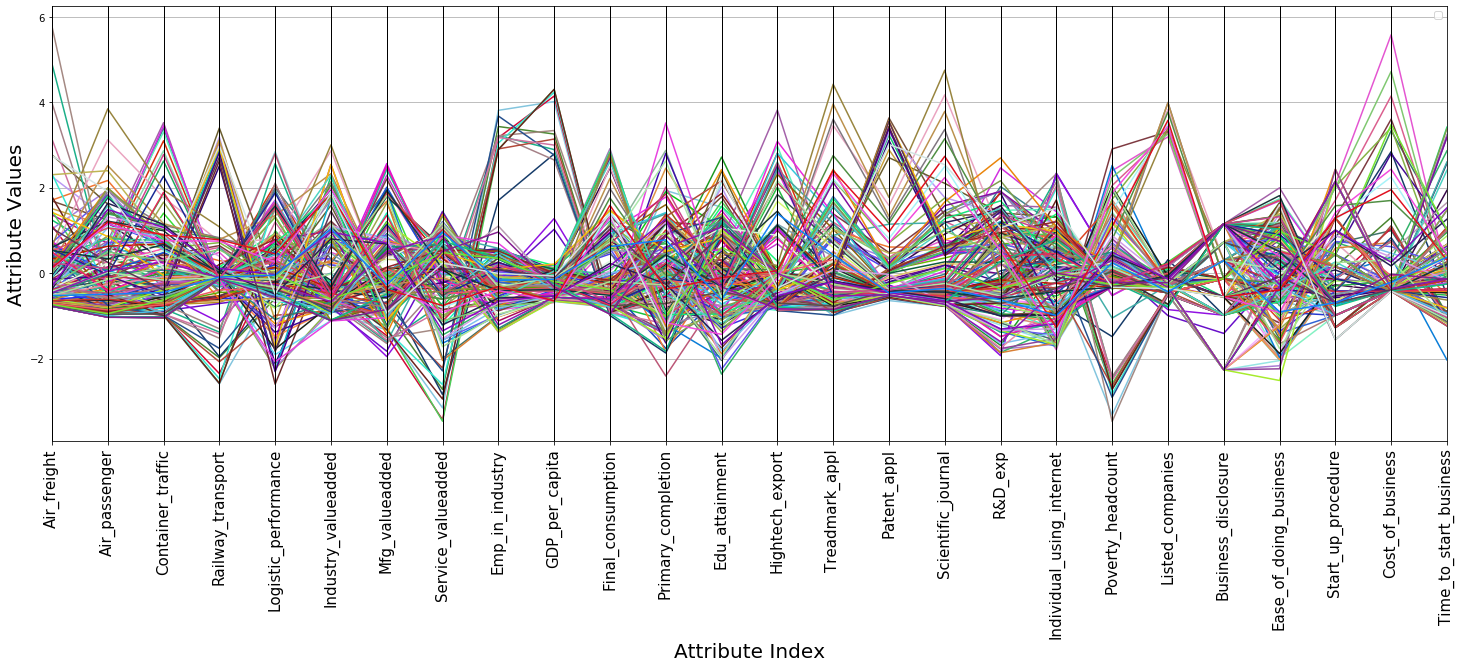

In [149]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(25,8))
random_subset = scaled_features_df.sample(n=185)

pd.plotting.parallel_coordinates(
    random_subset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport','Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                      'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                      'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                      'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                    'Listed_companies','Business_disclosure','Ease_of_doing_business',
                      'Start_up_procedure','Cost_of_business',
                     'Time_to_start_business','New_business_density']],'New_business_density')

plt.xlabel("Attribute Index",fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("Attribute Values", fontsize=20)
plt.legend('')
plt.show()

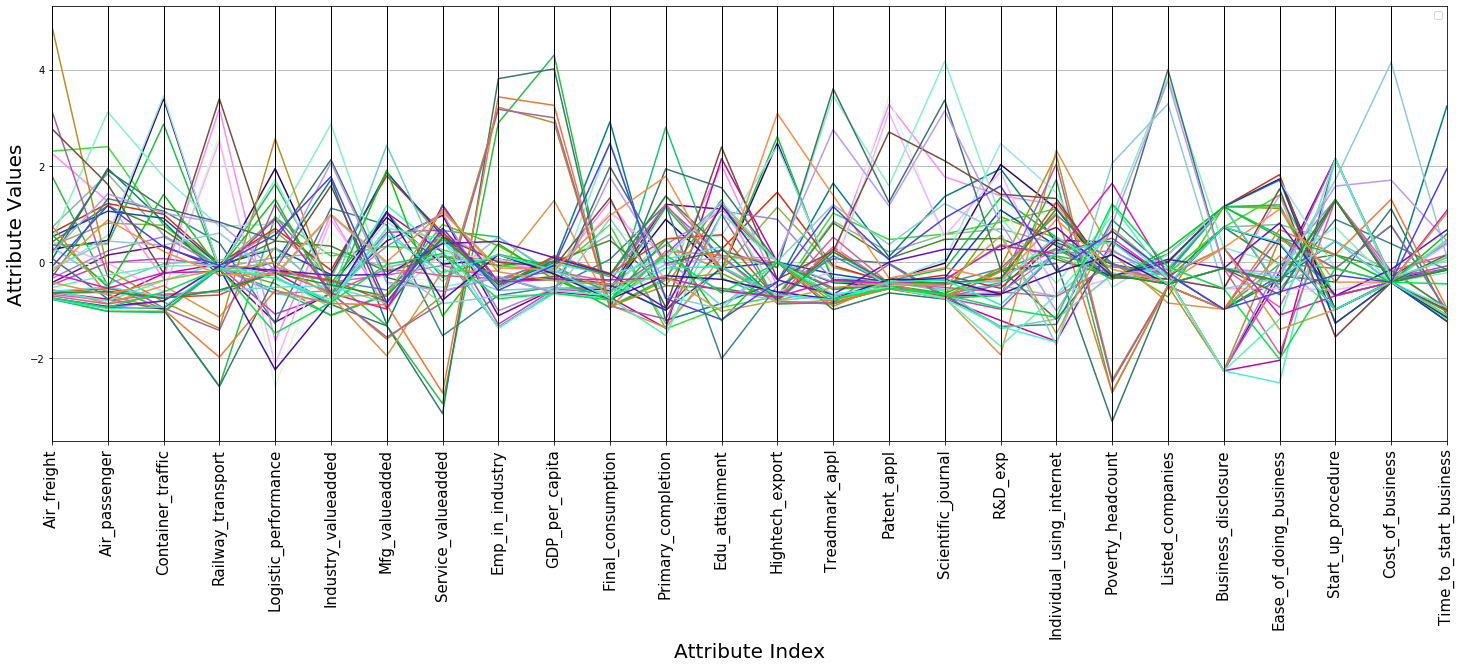

In [150]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(25,8))
random_subset = scaled_features_df.sample(n=50)

pd.plotting.parallel_coordinates(
    random_subset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport','Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                      'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                      'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                      'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                    'Listed_companies','Business_disclosure','Ease_of_doing_business',
                      'Start_up_procedure','Cost_of_business',
                     'Time_to_start_business','New_business_density']],'New_business_density')

plt.xlabel("Attribute Index",fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("Attribute Values", fontsize=20)
plt.legend('')
plt.show()

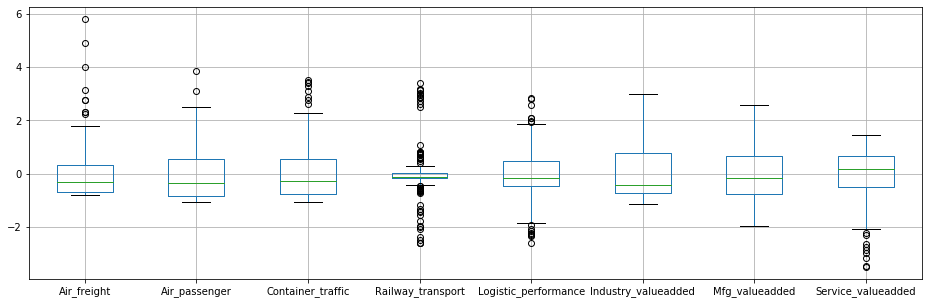

In [151]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Air_freight', 'Air_passenger', 'Container_traffic', 
                    'Railway_transport','Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded'])

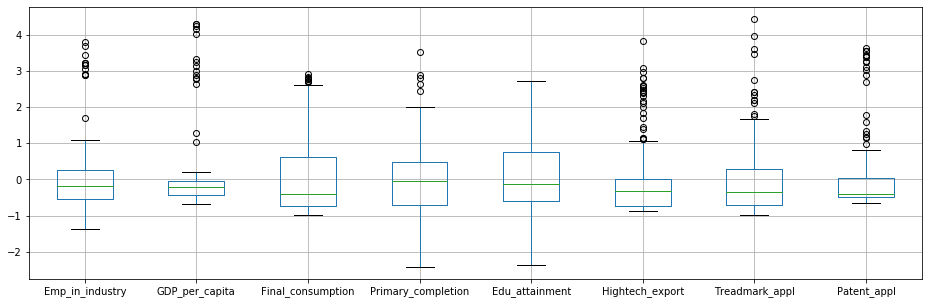

In [152]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                      'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl'])

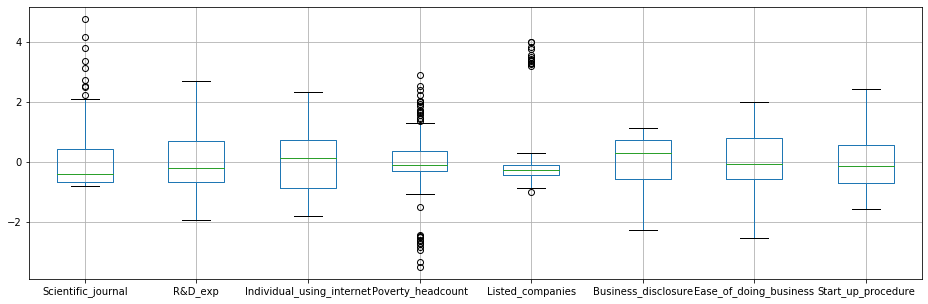

In [153]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                    'Listed_companies','Business_disclosure','Ease_of_doing_business',
                      'Start_up_procedure'])
                      

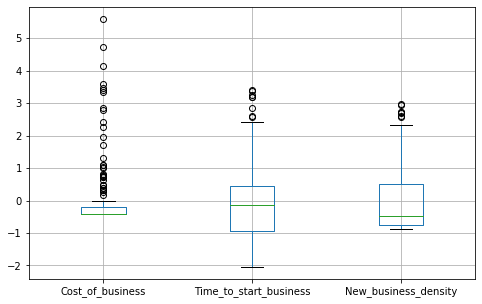

In [154]:
plt.figure(figsize=(8,5))
boxplot = scaled_features_df.boxplot(column=['Cost_of_business','Time_to_start_business','New_business_density'])

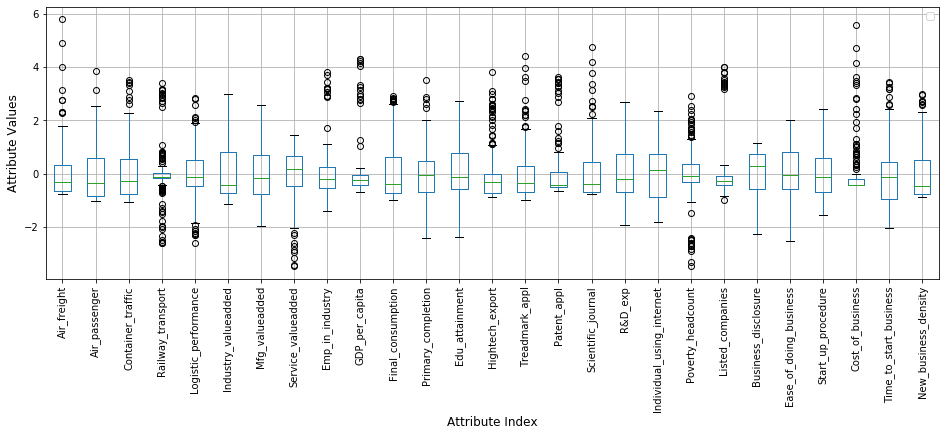

In [155]:
plt.figure(figsize=(16,5))
boxplot = scaled_features_df.boxplot(column=['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business','New_business_density'])
plt.xlabel("Attribute Index",fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Attribute Values", fontsize=12)
plt.legend('')
plt.show()

In [156]:
x=dataset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business']]
y=dataset['New_business_density']

In [157]:
x_norm = (x - x.mean()) / x.std()

In [158]:
y_norm = (y - y.mean()) / y.std()

In [159]:
train_norm_x,test_norm_x,train_norm_y,test_norm_y=train_test_split(x_norm,y_norm,test_size=0.3,random_state=50)

Regression Metrices on Train Data R2:0.808, MAE:0.290,MSE:0.158, RMSE:0.397
Regression Metrices on Test Data R2:0.742, MAE:0.462,MSE:0.344, RMSE:0.587


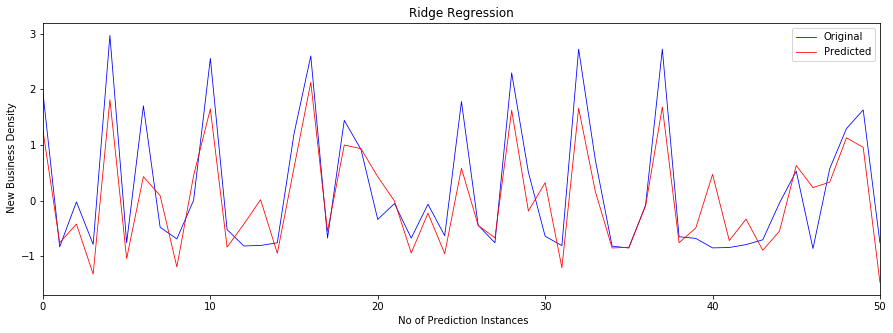

In [160]:
model_Ridge = linear_model.Ridge()
model = model_Ridge.fit(train_norm_x, train_norm_y)
ypred_train_Ridge = model.predict(train_norm_x)
ypred_test_Ridge = model.predict(test_norm_x)
score_train_Ridge = model_Ridge.score(train_norm_x, train_norm_y)
mae_train_Ridge=mean_absolute_error(train_norm_y, ypred_train_Ridge)
mse_train_Ridge = mean_squared_error(train_norm_y, ypred_train_Ridge)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_Ridge, mae_train_Ridge, mse_train_Ridge, np.sqrt(mse_train_Ridge)))

score_test_Ridge = model.score(test_norm_x, test_norm_y)
mae_test_Ridge=mean_absolute_error(test_norm_y, ypred_test_Ridge)
mse_test_Ridge = mean_squared_error(test_norm_y, ypred_test_Ridge)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_Ridge, mae_test_Ridge, mse_test_Ridge, np.sqrt(mse_test_Ridge)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_Ridge, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Ridge Regression")
plt.show()

Regression Metrices on Train Data R2:0.000, MAE:0.716,MSE:0.820, RMSE:0.906
Regression Metrices on Test Data R2:-0.066, MAE:0.907,MSE:1.423, RMSE:1.193


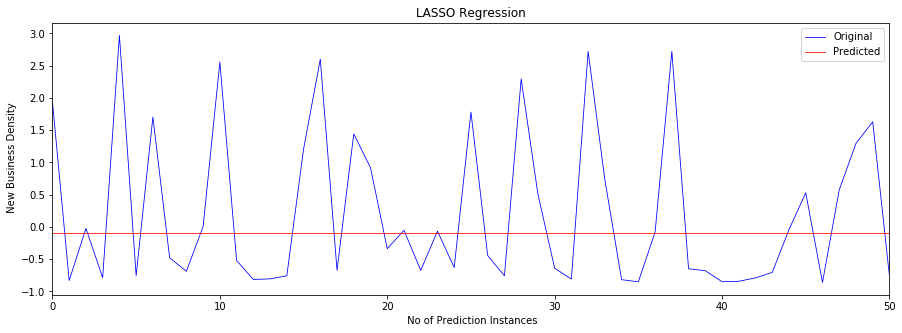

In [161]:
model_Lasso = linear_model.Lasso()
model = model_Lasso.fit(train_norm_x, train_norm_y)
ypred_train_Lasso = model.predict(train_norm_x)
ypred_test_Lasso = model.predict(test_norm_x)
score_train_Lasso = model_Lasso.score(train_norm_x, train_norm_y)
mae_train_Lasso=mean_absolute_error(train_norm_y, ypred_train_Lasso)
mse_train_Lasso = mean_squared_error(train_norm_y, ypred_train_Lasso)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_Lasso, mae_train_Lasso, mse_train_Lasso, np.sqrt(mse_train_Lasso)))

score_test_Lasso = model.score(test_norm_x, test_norm_y)
mae_test_Lasso=mean_absolute_error(test_norm_y, ypred_test_Lasso)
mse_test_Lasso = mean_squared_error(test_norm_y, ypred_test_Lasso)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_Lasso, mae_test_Lasso, mse_test_Lasso, np.sqrt(mse_test_Lasso)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_Lasso, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("LASSO Regression")
plt.show()

Regression Metrices on Train Data R2:0.000, MAE:0.716,MSE:0.820, RMSE:0.906
Regression Metrices on Test Data R2:-0.066, MAE:0.907,MSE:1.423, RMSE:1.193


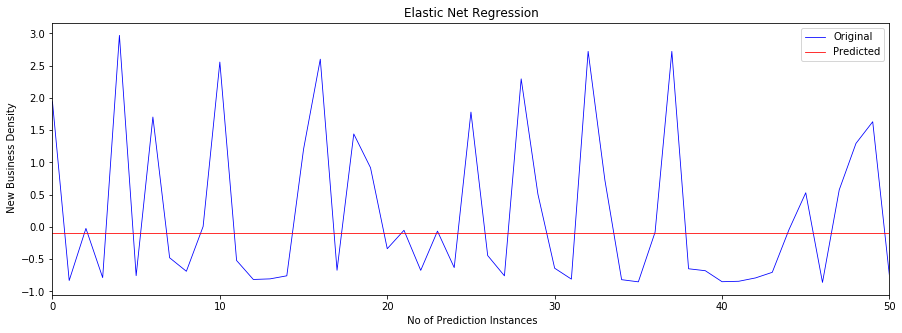

In [162]:
model_ElasticNet = linear_model.ElasticNet()
model = model_ElasticNet.fit(train_norm_x, train_norm_y)
ypred_train_ElasticNet = model.predict(train_norm_x)
ypred_test_ElasticNet = model.predict(test_norm_x)
score_train_ElasticNet = model_ElasticNet.score(train_norm_x, train_norm_y)
mae_train_ElasticNet=mean_absolute_error(train_norm_y, ypred_train_ElasticNet)
mse_train_ElasticNet = mean_squared_error(train_norm_y, ypred_train_ElasticNet)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_ElasticNet, mae_train_ElasticNet, mse_train_ElasticNet, np.sqrt(mse_train_ElasticNet)))

score_test_ElasticNet = model.score(test_norm_x, test_norm_y)
mae_test_ElasticNet=mean_absolute_error(test_norm_y, ypred_test_ElasticNet)
mse_test_ElasticNet = mean_squared_error(test_norm_y, ypred_test_ElasticNet)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_ElasticNet, mae_test_ElasticNet, mse_test_ElasticNet, np.sqrt(mse_test_ElasticNet)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_ElasticNet, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Elastic Net Regression")
plt.show()

Regression Metrices on Train Data R2:-3.582, MAE:1.452,MSE:3.758, RMSE:1.938
Regression Metrices on Test Data R2:-3.397, MAE:2.105,MSE:5.869, RMSE:2.423


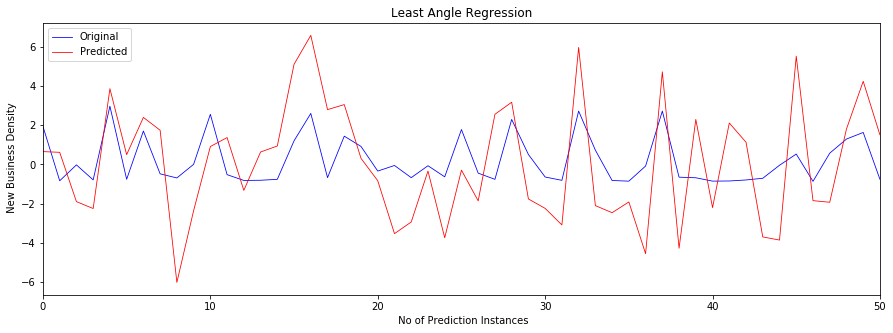

In [163]:
model_LAR = linear_model.Lars()
model = model_LAR.fit(train_norm_x, train_norm_y)
ypred_train_LAR = model.predict(train_norm_x)
ypred_test_LAR = model.predict(test_norm_x)
score_train_LAR = model_LAR.score(train_norm_x, train_norm_y)
mae_train_LAR=mean_absolute_error(train_norm_y, ypred_train_LAR)
mse_train_LAR = mean_squared_error(train_norm_y, ypred_train_LAR)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_LAR, mae_train_LAR, mse_train_LAR, np.sqrt(mse_train_LAR)))

score_test_LAR = model.score(test_norm_x, test_norm_y)
mae_test_LAR=mean_absolute_error(test_norm_y, ypred_test_LAR)
mse_test_LAR = mean_squared_error(test_norm_y, ypred_test_LAR)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_LAR, mae_test_LAR, mse_test_LAR, np.sqrt(mse_test_LAR)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_LAR, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Least Angle Regression")
plt.show()

Regression Metrices on Train Data R2:0.863, MAE:0.244,MSE:0.112, RMSE:0.335
Regression Metrices on Test Data R2:0.821, MAE:0.384,MSE:0.238, RMSE:0.488


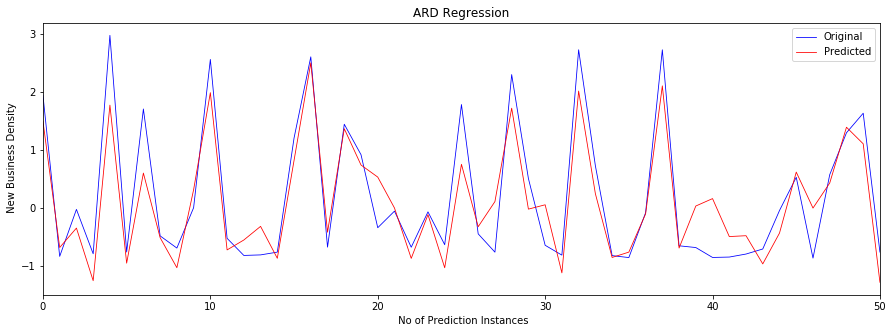

In [164]:
model_ARD = linear_model.ARDRegression()
model = model_ARD.fit(train_norm_x, train_norm_y)
ypred_train_ARD = model.predict(train_norm_x)
ypred_test_ARD = model.predict(test_norm_x)
score_train_ARD = model_ARD.score(train_norm_x, train_norm_y)
mae_train_ARD=mean_absolute_error(train_norm_y, ypred_train_ARD)
mse_train_ARD = mean_squared_error(train_norm_y, ypred_train_ARD)
print("Regression Metrices on Train Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_train_ARD, mae_train_ARD, mse_train_ARD, np.sqrt(mse_train_ARD)))

score_test_ARD = model.score(test_norm_x, test_norm_y)
mae_test_ARD=mean_absolute_error(test_norm_y, ypred_test_ARD)
mse_test_ARD = mean_squared_error(test_norm_y, ypred_test_ARD)
print("Regression Metrices on Test Data","R2:{0:.3f}, MAE:{1:.3F},MSE:{2:.3f}, RMSE:{3:.3f}"
      .format(score_test_ARD, mae_test_ARD, mse_test_ARD, np.sqrt(mse_test_ARD)))
x_ax = range(len(test_norm_x))
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_ARD, lw=0.8, color="red", label="Predicted")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("ARD Regression")
plt.show()

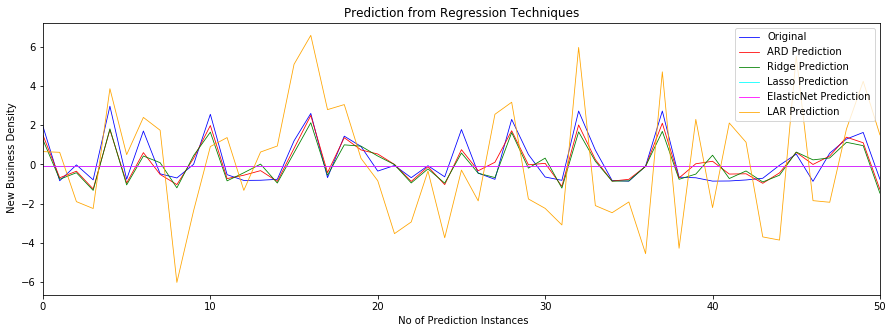

In [165]:
plt.figure(figsize=(15, 5))
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred_test_ARD, lw=0.8, color="red", label="ARD Prediction")
plt.plot(x_ax, ypred_test_Ridge, lw=0.8, color="green", label="Ridge Prediction")
plt.plot(x_ax, ypred_test_Lasso, lw=0.8, color="cyan", label="Lasso Prediction")
plt.plot(x_ax, ypred_test_ElasticNet, lw=0.8, color="magenta", label="ElasticNet Prediction")
plt.plot(x_ax, ypred_test_LAR, lw=0.8, color="orange", label="LAR Prediction")
plt.xlim (0,50)
plt.xlabel(' No of Prediction Instances')
plt.ylabel(' New Business Density')
plt.legend()
plt.title("Prediction from Regression Techniques")
plt.show()

In [166]:
print ('Coefficients: ', model_ARD.coef_)

Coefficients:  [ 5.73926469e-01 -1.19456524e+00  5.45290344e-01  5.61818706e-01
 -2.80094010e-02 -1.15319260e+00 -7.59483010e-01 -5.84920052e-04
 -2.20149263e-03  2.09360554e+00  0.00000000e+00  0.00000000e+00
 -1.01445401e-03 -3.20665786e-01  1.45086420e+00 -2.43878766e-03
 -1.51540852e-03  0.00000000e+00 -1.98769921e+00  1.74561084e+00
 -7.95990406e-01  0.00000000e+00  2.32299386e+00  3.73161964e-01
 -9.72753755e-01  3.51301901e-01]


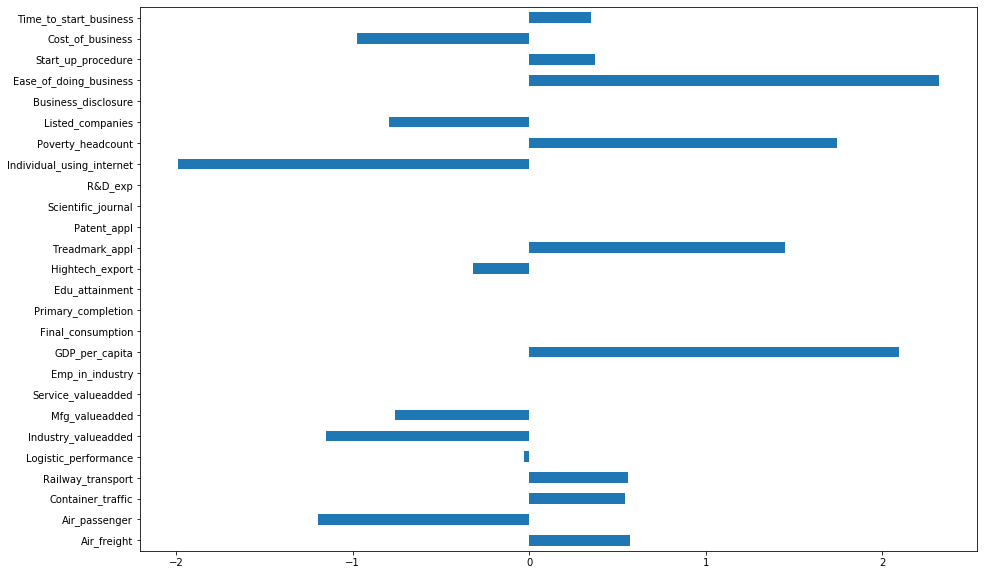

In [167]:
plt.figure(figsize=(15,10))
ft_importance_ARD=pd.Series(model_ARD.coef_,index=x.columns)
ft_importance_ARD.plot(kind='barh')
plt.show()

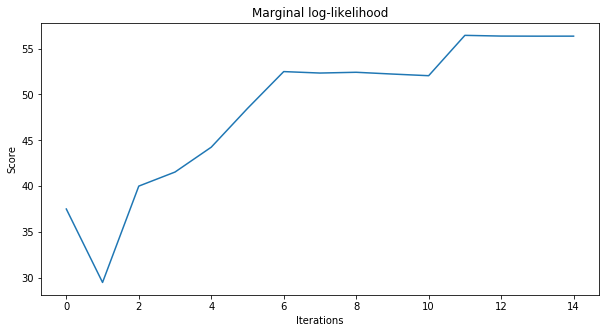

In [168]:
model_ARD= linear_model.ARDRegression(compute_score=True)
model_ARD.fit(x_norm, y_norm)
plt.figure(figsize=(10, 5))
plt.title("Marginal log-likelihood")
plt.plot(model_ARD.scores_)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

In [169]:
Error=ypred_test_ARD-test_norm_y

In [170]:
df = pd.DataFrame({'Actual': test_norm_y, 'Predicted': ypred_test_ARD, 'Error': Error})
df.head()

,Actual,Predicted,Error
20,1.938883,1.492944,-0.445939
54,-0.832326,-0.679442,0.152884
88,-0.024167,-0.345520,-0.321354
39,-0.787494,-1.250605,-0.463111
25,2.968637,1.768944,-1.199693


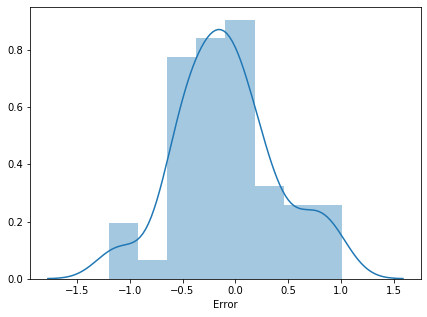

In [171]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.tight_layout()
sns.distplot(df['Error'])

In [172]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import ARDRegression

In [173]:
# Feature extraction
model = ARDRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x_norm, y_norm)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [ True  True False False False  True  True False False  True False False
 False False False False False False  True  True False False  True False
  True  True]
Feature Ranking: [ 1  1  6  2 14  1  1 11 13  1 12 15 17  7  3 10  9 16  1  1  4  8  1  5
  1  1]


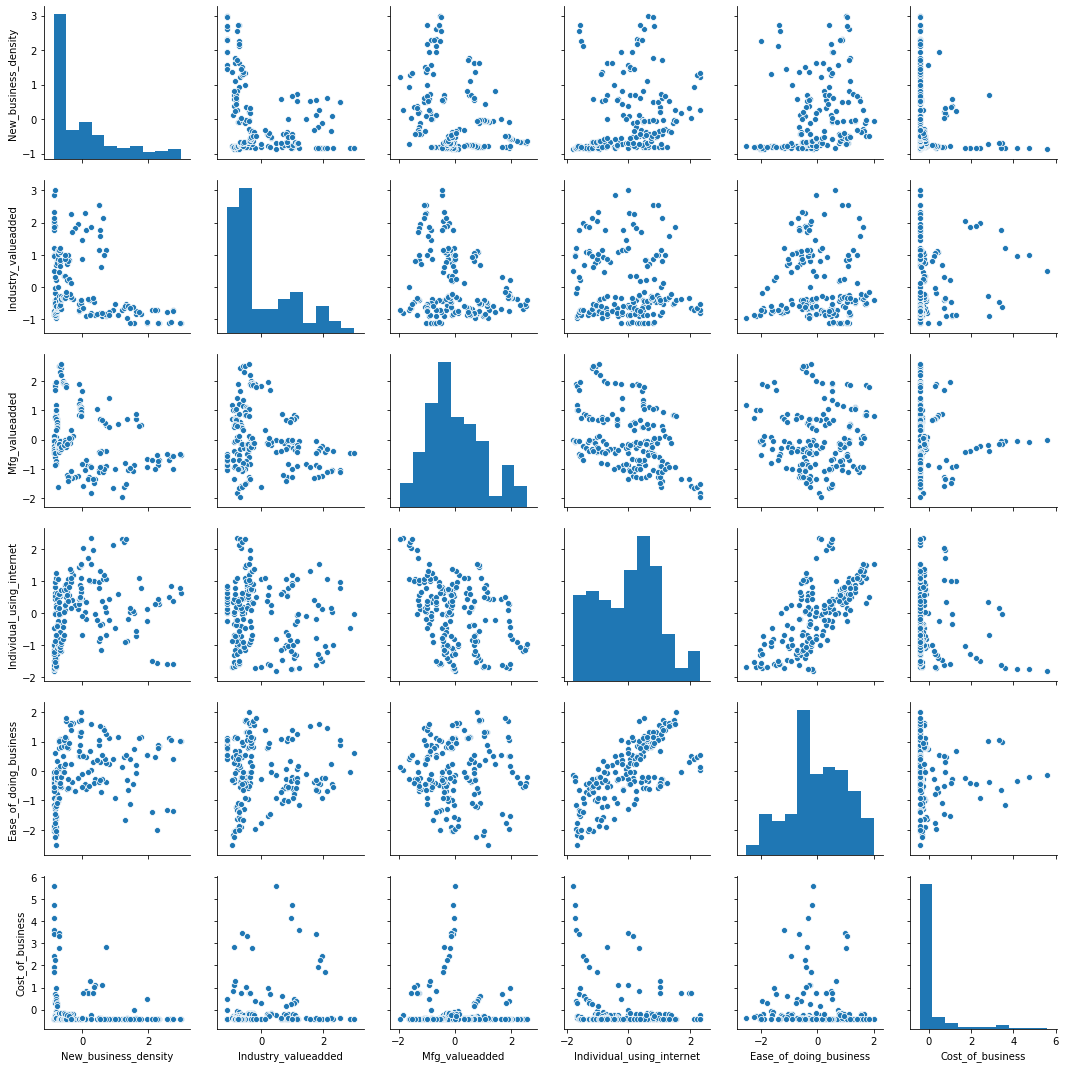

In [174]:
sns.pairplot(scaled_features_df[['New_business_density', 'Industry_valueadded','Mfg_valueadded','Individual_using_internet','Ease_of_doing_business','Cost_of_business']])

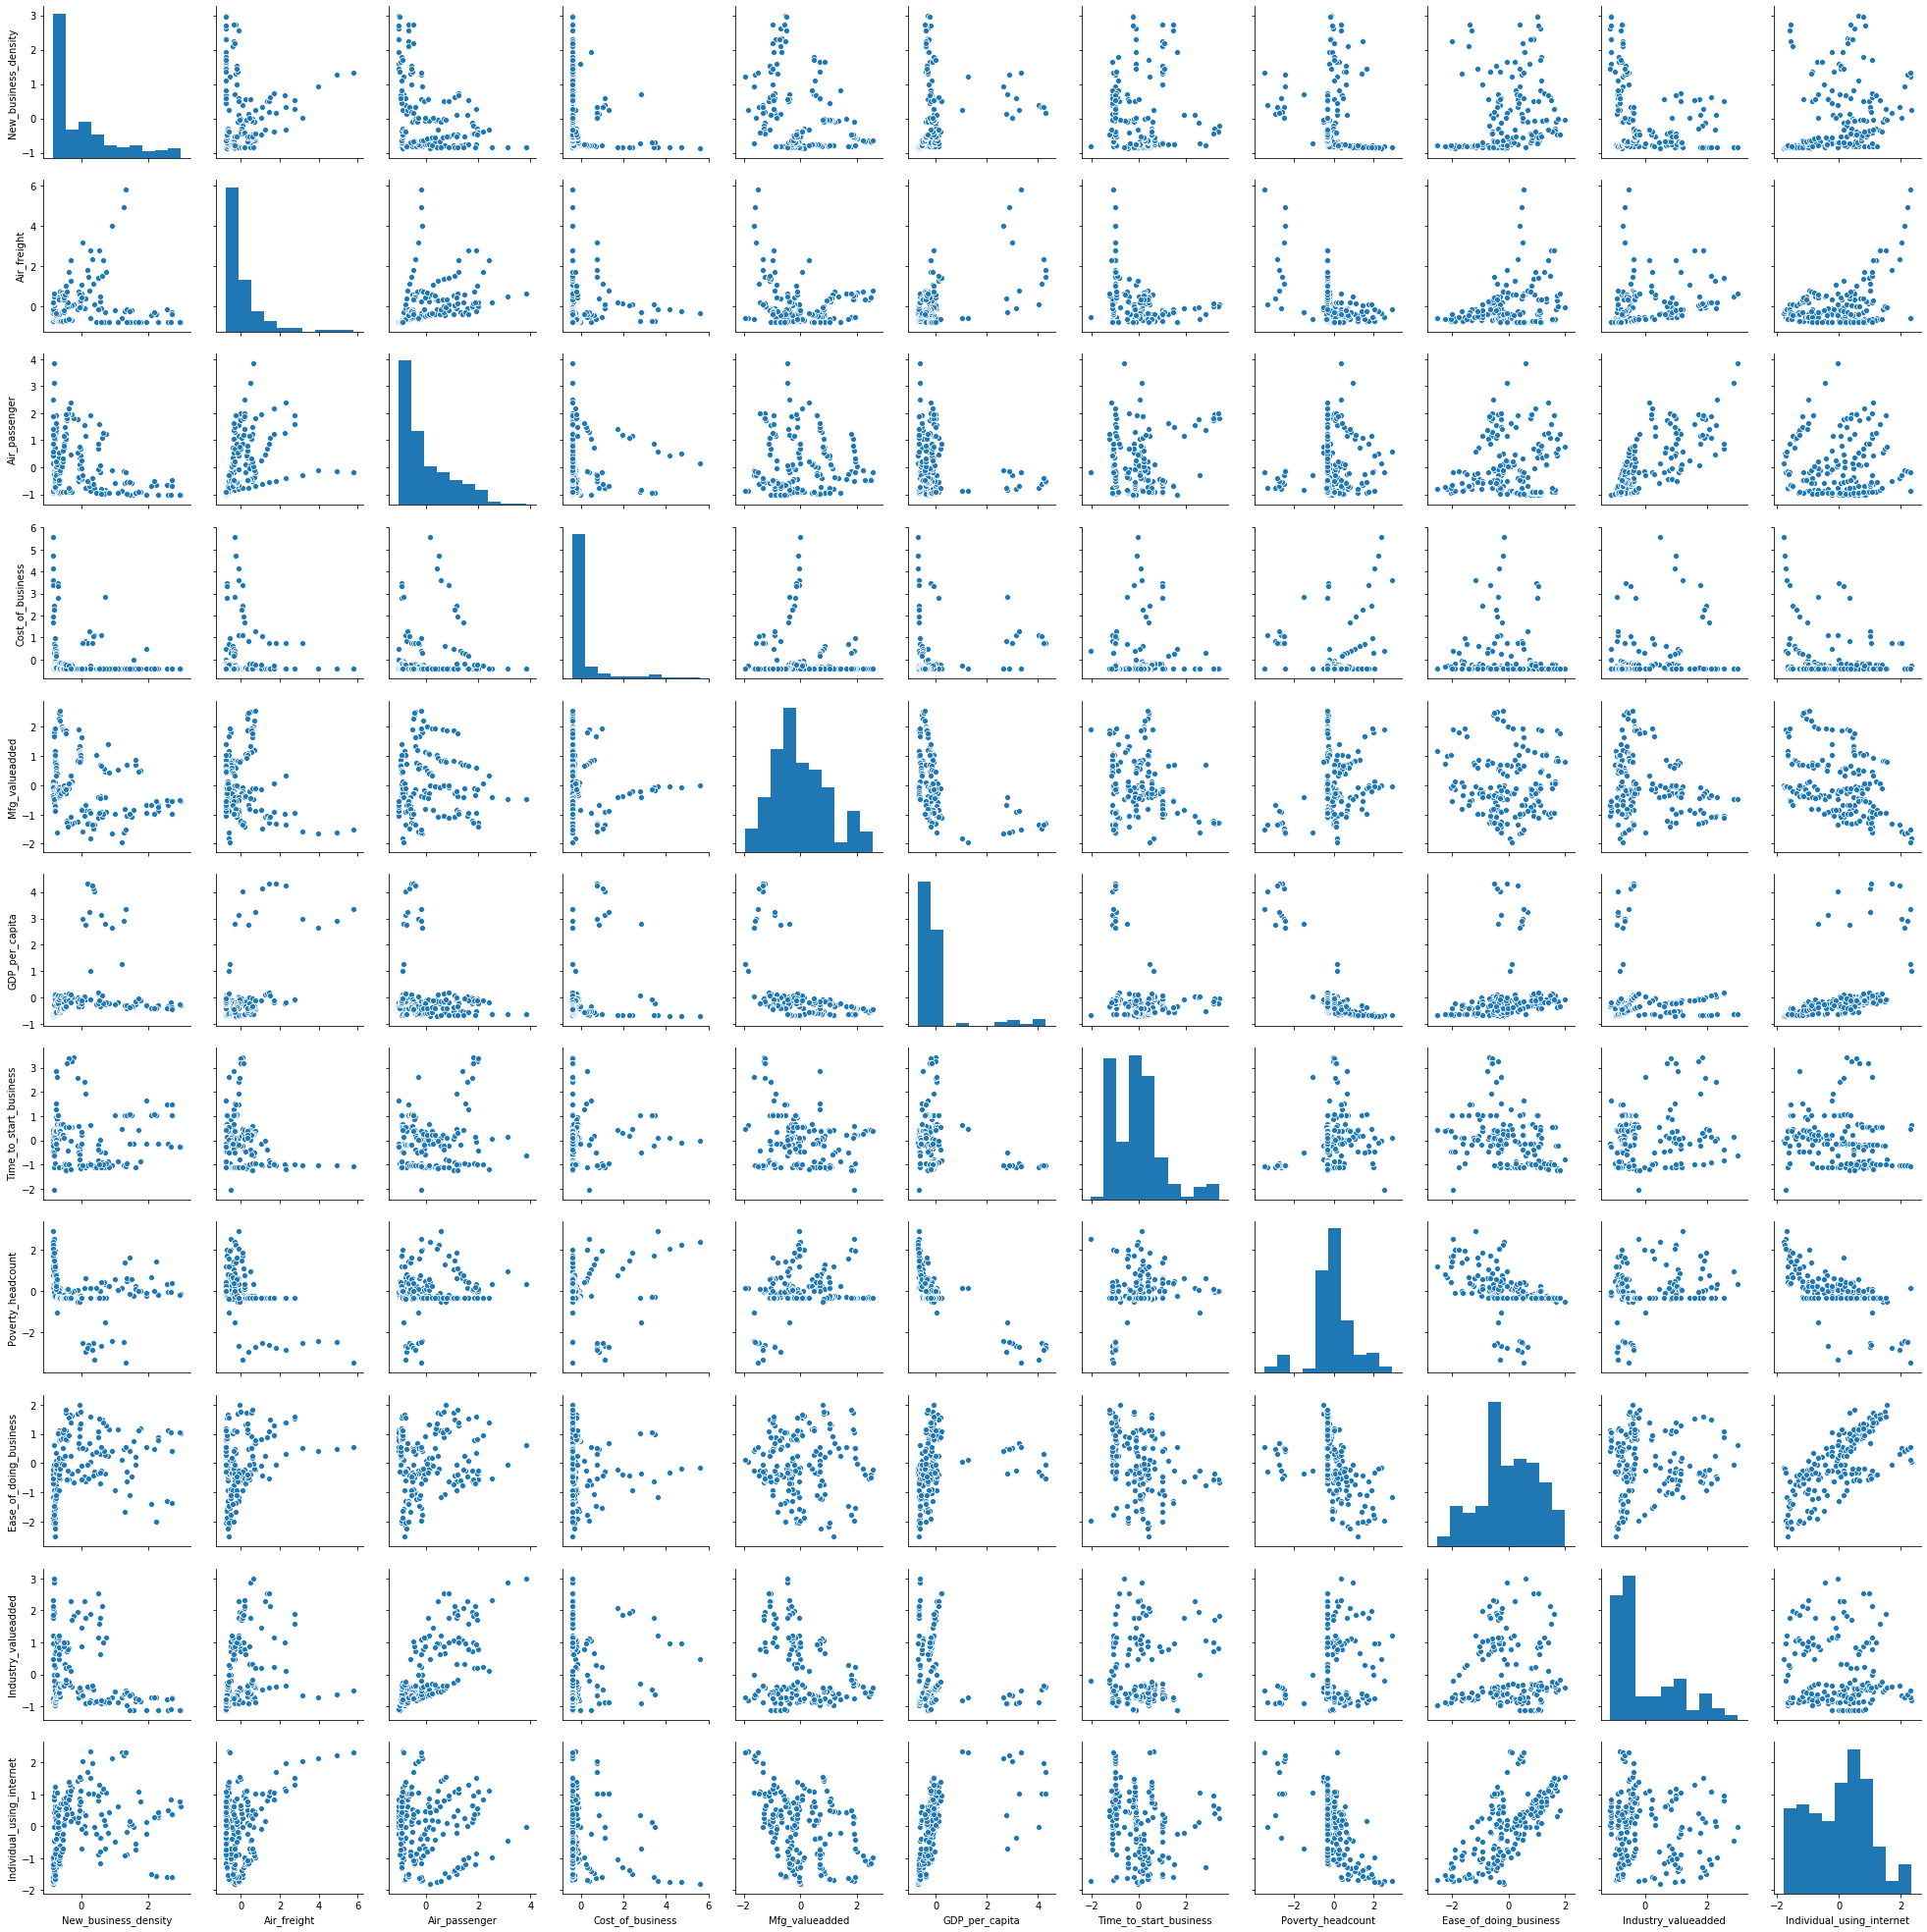

In [175]:
sns.pairplot(scaled_features_df[['New_business_density','Air_freight','Air_passenger','Cost_of_business','Mfg_valueadded','GDP_per_capita',
                                'Time_to_start_business','Poverty_headcount','Ease_of_doing_business','Industry_valueadded','Individual_using_internet']])

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from math import log
from sklearn.metrics import mean_squared_error

In [177]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

In [178]:

# define and fit the model on all data
model = ARDRegression()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)


Number of parameters: 27
MSE: 0.138
AIC: -311.856


In [179]:
# define and fit the model on all data
model = Ridge()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 0.180
AIC: -263.399


In [180]:
# define and fit the model on all data
model = Lasso()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 0.995
AIC: 52.997


In [181]:
# define and fit the model on all data
model = ElasticNet()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 0.977
AIC: 49.632


In [182]:
# define and fit the model on all data
model = Lars()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y_norm), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 27
MSE: 314.557
AIC: 1117.966


In [183]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

In [184]:
# define and fit the model on all data
model = ARDRegression()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.138
BIC: -224.906


In [185]:
# define and fit the model on all data
model = Ridge()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.180
BIC: -176.450


In [186]:
# define and fit the model on all data
model = Lasso()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.995
BIC: 139.947


In [187]:
# define and fit the model on all data
model = ElasticNet()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 0.977
BIC: 136.581


In [188]:
# define and fit the model on all data
model = Lars()
model.fit(x_norm, y_norm)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(x_norm)
# calculate the error
mse = mean_squared_error(y_norm, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y_norm), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 27
MSE: 314.557
BIC: 1204.915
